In [1]:
import numpy as np
import pandas as pd
import MLP
import function

In [2]:
clf = pd.read_csv('Classification_data.csv', index_col=0)

In [3]:
clf.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,0.1
0,-1.119074,1.327309,0.532884,2.411662,-1.452468,0.468861,-3.050753,-2.290584,-1.554485,2.499179,...,-2.280496,-0.350879,-9.408763,-0.383196,3.866907,0.288105,2.478718,-2.994757,0.470781,1
1,-3.687545,-2.856967,1.289577,1.997781,0.127788,0.541779,17.120352,-1.001149,-0.521598,-1.857728,...,3.489589,3.766433,2.944384,0.221809,-3.498572,0.213255,2.567607,-5.564065,-3.386356,7
2,0.124132,-1.086672,2.848955,4.315495,-1.948189,0.143815,1.928711,-0.211265,-0.363530,0.419066,...,-1.670724,0.076562,-14.406826,1.345649,-3.246245,0.082761,-0.865229,-2.560019,6.895107,4
3,-3.308688,-3.228528,6.839562,-6.206159,-3.019658,-0.496991,7.556156,-0.533705,-0.736403,1.317450,...,-0.517643,-1.645468,-8.374143,-1.008553,2.673172,-1.195258,1.621585,0.190973,-2.322724,3
4,-4.443019,-0.762361,-2.360865,0.994624,3.668265,-0.033088,11.488804,-0.564922,-0.884757,-0.070465,...,3.210542,1.766666,1.772125,-0.047646,-0.780854,-1.460236,0.612321,-2.596281,0.055099,3


In [4]:
X_train, X_test, y_train, y_test = clf.iloc[:800,:-1].values, clf.iloc[800:,:-1].values, pd.get_dummies(clf.iloc[:800,-1]).values, pd.get_dummies(clf.iloc[800:,-1]).values


In [5]:
network = MLP.MultilayerPerceptron(input_n=30, output_n=10, mode=1)

iters_num = 10000
train_size = X_train.shape[0]
batch_size = 50
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

In [6]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    grad = network.gradient(X_batch, y_batch)
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
#     print (network.params['W1'])
    
    loss = network.loss(X_batch, y_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, y_train)
        test_acc = network.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.10375 0.085
0.10375 0.085
0.1025 0.09
0.10625 0.075
0.1025 0.09
0.1025 0.09
0.10125 0.1
0.10125 0.1
0.10125 0.1
0.10125 0.1
0.10625 0.075
0.1 0.095
0.1 0.095
0.10625 0.075
0.10625 0.075
0.10625 0.075
0.10625 0.075
0.10625 0.075
0.10625 0.075
0.10625 0.075
0.10625 0.075
0.10625 0.075
0.1425 0.085
0.10375 0.085
0.10375 0.085
0.11625 0.09
0.125 0.095
0.10625 0.09
0.10625 0.09
0.115 0.09
0.12375 0.085
0.145 0.08
0.1475 0.08
0.14375 0.085
0.1475 0.09
0.145 0.1
0.1425 0.1
0.14375 0.1
0.13625 0.095
0.1375 0.1
0.17125 0.145
0.1425 0.155
0.1625 0.135
0.1675 0.13
0.19 0.19
0.2025 0.165
0.20125 0.145
0.2025 0.145
0.2175 0.165
0.2275 0.15
0.22125 0.15
0.23625 0.145
0.24 0.15
0.2525 0.16
0.25625 0.215
0.27125 0.18
0.3 0.19
0.29625 0.205
0.33125 0.2
0.32625 0.22
0.36 0.26
0.41 0.24
0.39625 0.245
0.4125 0.26
0.42875 0.275
0.46625 0.275
0.46375 0.3
0.48125 0.28
0.51625 0.27
0.5175 0.29
0.535 0.31
0.5375 0.305
0.545 0.305
0.5575 0.32
0.57125 0.335
0.58625 0.36
0.6025 0.335
0.60875 0.31
0.605 0.335
0.

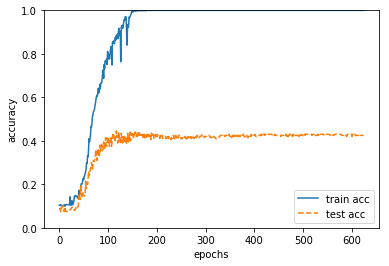

In [8]:
import matplotlib.pyplot as plt

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()